In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'supplemetary_information_table_SIT2.DETs.xlsx'

In [4]:
df_up = pandas.read_excel(input_file, sheet_name='50 uM | 4 h | up', index_col=0)
df_up.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000023171,GRAMD1B,protein_coding,GRAM domain containing 1B,10731.4811,5.8504,2.670000e-84,9.640000e-80,1.6014,95.1873,5.0000
ENSG00000109321,AREG,protein_coding,amphiregulin,4825.8831,5.2381,5.990000e-07,3.330000e-04,1.4804,90.8281,5.5236
ENSG00000004799,PDK4,protein_coding,pyruvate dehydrogenase kinase 4,6639.1946,4.5965,3.960000e-27,1.430000e-23,1.4458,41.3208,4.3923
ENSG00000121966,CXCR4,protein_coding,C-X-C motif chemokine receptor 4,5748.7410,4.2110,1.140000e-43,1.370000e-39,3.4755,68.5694,4.1293
ENSG00000119508,NR4A3,protein_coding,nuclear receptor subfamily 4 group A member 3,2541.8283,4.1995,3.810000e-38,2.290000e-34,0.4073,9.0126,3.3219


In [5]:
df_down = pandas.read_excel(input_file, sheet_name='50 uM | 4 h | down', index_col=0)
df_down.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000267459,AC006116.27,transcribed_processed_pseudogene,NaN,153.6787,-10.5887,1.990000e-10,1.840000e-07,3.5326,0.0000,2.3219
ENSG00000272104,XXcos-LUCA11.5,protein_coding,NaN,35.1853,-8.4660,4.000000e-05,1.360000e-02,2.3084,0.0000,1.5850
ENSG00000232682,RP11-388P9.2,antisense,NaN,398.3921,-4.4690,1.250000e-16,2.260000e-13,7.0934,0.3296,3.0000
ENSG00000149633,KIAA1755,protein_coding,KIAA1755,1289.8924,-4.2080,6.210000e-37,3.200000e-33,14.5021,0.9646,3.0000
ENSG00000226964,RHEBP2,processed_pseudogene,NaN,118.8049,-4.0818,9.860000e-08,6.600000e-05,4.2089,0.2432,2.3219


In [6]:
xu = df_up['log2FC']
xd = df_down['log2FC']
yu = -numpy.log10(df_up['Adjusted P-value'])
yd = -numpy.log10(df_down['Adjusted P-value'])

In [7]:
yu[yu > 20] = 20
yd[yd > 20] = 20
xu[xu > 5] = 5
xd[xd < -5] = -5

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2963/485980704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xu[xu > 5] = 5
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2963/485980704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd[xd < -5] = -5


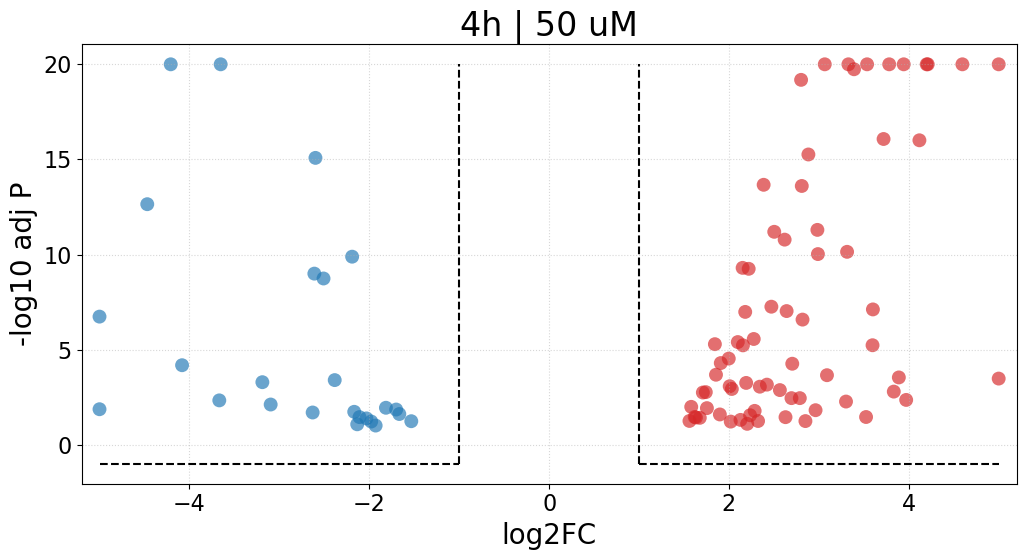

In [8]:
matplotlib.pyplot.scatter(xu, yu, color='tab:red', s=100, alpha=2/3, edgecolors='none')
matplotlib.pyplot.scatter(xd, yd, color='tab:blue', s=100, alpha=2/3, edgecolors='none')

matplotlib.pyplot.plot([-1, -1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([1, 1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([-5, -1], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')
matplotlib.pyplot.plot([1, 5], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')

matplotlib.pyplot.xlabel('log2FC')
matplotlib.pyplot.ylabel('-log10 adj P')
matplotlib.pyplot.xlim([-5.2, 5.2])
matplotlib.pyplot.title('4h | 50 uM')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('fifty_four.svg')